In [48]:
import yfinance as yf
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import acquire

In [2]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [3]:
sp500.index = pd.to_datetime(sp500.index)


In [4]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


<AxesSubplot:xlabel='Date'>

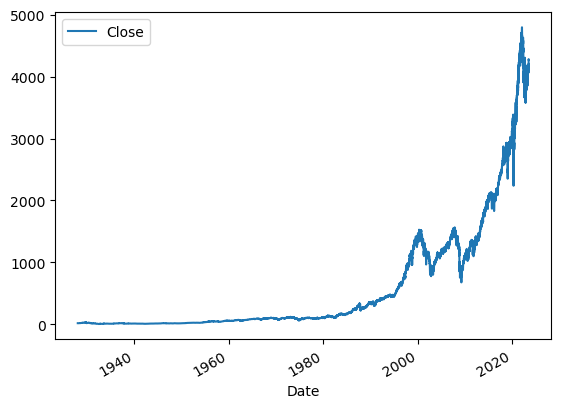

In [5]:
sp500.plot.line(y="Close", use_index=True)


#### add to prep - 
* create tomorrow 
* lower case
* drop stock split, dividend
* add target column 0=down 1= up


In [6]:
# creating tomorrow column = prior day closing price
# this will alos be the target as its what we are trying to guess
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,0.0,0.0,4179.830078
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,0.0,0.0,4221.020020
2023-06-01 00:00:00-04:00,4183.029785,4232.430176,4171.640137,4221.020020,4391860000,0.0,0.0,4282.370117


In [7]:
sp500.columns = [col.lower() for col in sp500]


In [8]:
sp500['stock splits'].nunique

<bound method IndexOpsMixin.nunique of Date
1927-12-30 00:00:00-05:00    0.0
1928-01-03 00:00:00-05:00    0.0
1928-01-04 00:00:00-05:00    0.0
1928-01-05 00:00:00-05:00    0.0
1928-01-06 00:00:00-05:00    0.0
                            ... 
2023-05-30 00:00:00-04:00    0.0
2023-05-31 00:00:00-04:00    0.0
2023-06-01 00:00:00-04:00    0.0
2023-06-02 00:00:00-04:00    0.0
2023-06-05 00:00:00-04:00    0.0
Name: stock splits, Length: 23971, dtype: float64>

In [9]:
# since are data set is a market index and not tradable there should be 0 splits
all_zero = (sp500['stock splits'] == 0).count()
print(all_zero)
# drop the column
print(sp500.shape)

23971
(23971, 8)


In [10]:
# same for dividends
all_zero = (sp500['dividends'] == 0).count()
print(all_zero)

23971


In [11]:
# dropping unused columns
sp500 = sp500.drop(['stock splits', 'dividends'], axis=1)


In [12]:
sp500.head()

,open,high,low,close,volume,tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [13]:
#setting target as tomorrow
# setting it as an int so that i get 0 for down days and 1 for up days
sp500["target"] = (sp500["tomorrow"] > sp500["close"]).astype(int)

In [16]:
sp500.index

Index([1927-12-30 00:00:00-05:00, 1928-01-03 00:00:00-05:00,
       1928-01-04 00:00:00-05:00, 1928-01-05 00:00:00-05:00,
       1928-01-06 00:00:00-05:00, 1928-01-09 00:00:00-05:00,
       1928-01-10 00:00:00-05:00, 1928-01-11 00:00:00-05:00,
       1928-01-12 00:00:00-05:00, 1928-01-13 00:00:00-05:00,
       ...
       2023-05-22 00:00:00-04:00, 2023-05-23 00:00:00-04:00,
       2023-05-24 00:00:00-04:00, 2023-05-25 00:00:00-04:00,
       2023-05-26 00:00:00-04:00, 2023-05-30 00:00:00-04:00,
       2023-05-31 00:00:00-04:00, 2023-06-01 00:00:00-04:00,
       2023-06-02 00:00:00-04:00, 2023-06-05 00:00:00-04:00],
      dtype='object', name='Date', length=23971)

In [20]:
# Convert index to timezone-naive datetime format 
sp500.index = pd.to_datetime(sp500.index, utc=True).normalize()

In [22]:
# use a copy that only has dates from 1990 onwards
sp500 = sp500.loc["1990-01-01":].copy()


In [53]:
sp500.index

Index([1990-01-02, 1990-01-03, 1990-01-04, 1990-01-05, 1990-01-08, 1990-01-09,
       1990-01-10, 1990-01-11, 1990-01-12, 1990-01-15,
       ...
       2023-05-22, 2023-05-23, 2023-05-24, 2023-05-25, 2023-05-26, 2023-05-30,
       2023-05-31, 2023-06-01, 2023-06-02, 2023-06-05],
      dtype='object', length=8421)

In [23]:
sp500.head()

,open,high,low,close,volume,tomorrow,target
Date,,,,,,,
1990-01-02 00:00:00+00:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00+00:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00+00:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00+00:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00+00:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [29]:
# dropping time since they are all the same and I only need the dates
sp500.index = sp500.index.date

AttributeError: 'Index' object has no attribute 'date'

In [30]:
sp500.head()

,open,high,low,close,volume,tomorrow,target
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


<AxesSubplot:>

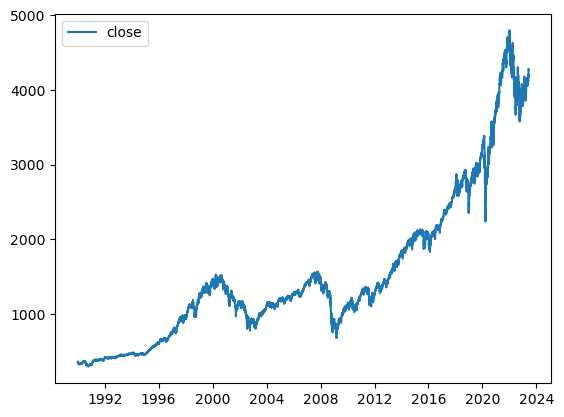

In [32]:
sp500.plot.line(y="close", use_index=True)


<AxesSubplot:>

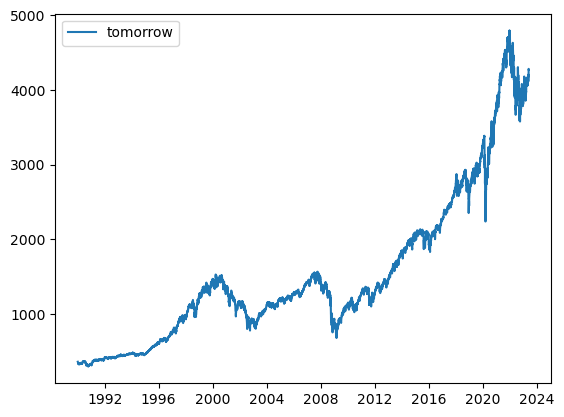

In [33]:
sp500.plot.line(y="tomorrow", use_index=True)


<AxesSubplot:>

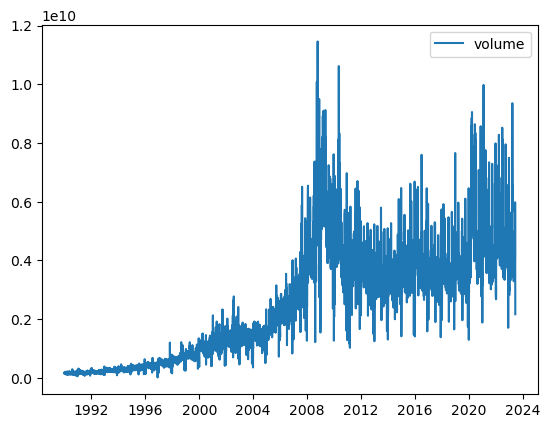

In [34]:
sp500.plot.line(y="volume", use_index=True)


<AxesSubplot:ylabel='Frequency'>

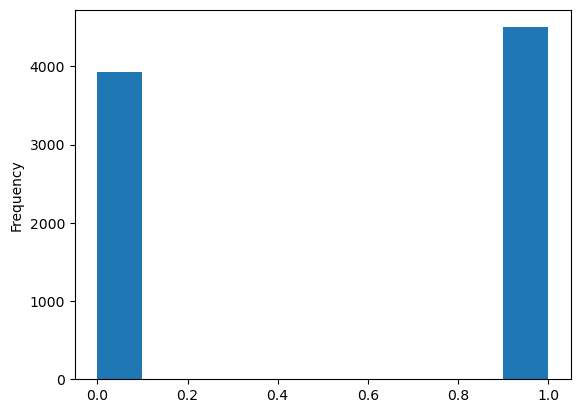

In [42]:
sp500.target.plot.hist()


In [46]:
acquire.get_sp500()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,0.0,0.0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,0.0,0.0
2023-06-01 00:00:00-04:00,4183.029785,4232.430176,4171.640137,4221.020020,4391860000,0.0,0.0


open


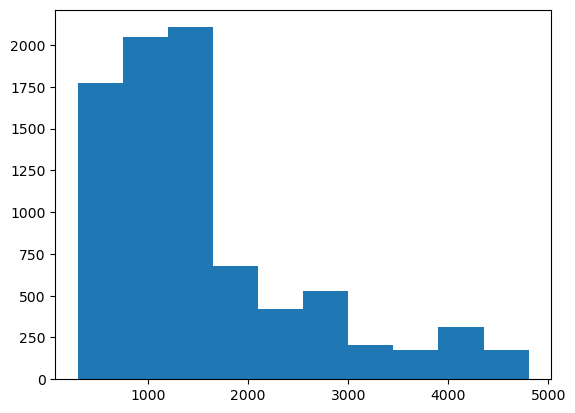

high


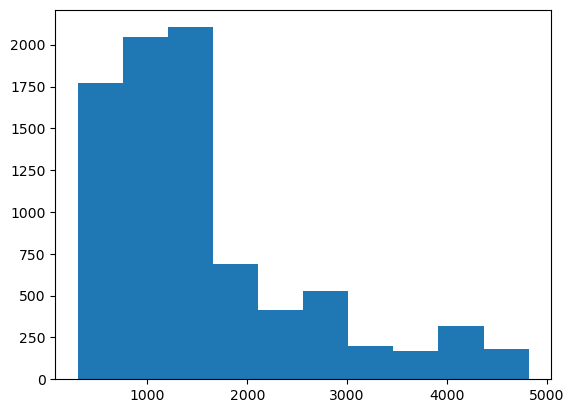

low


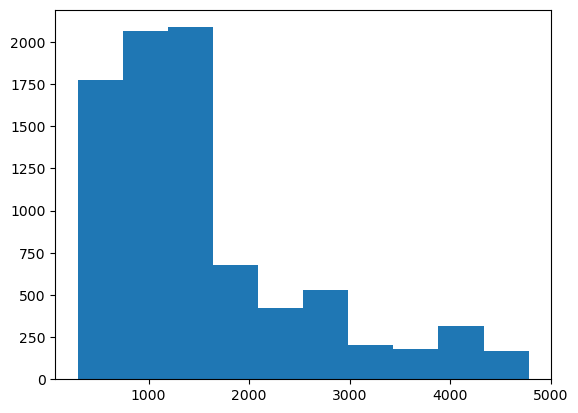

close


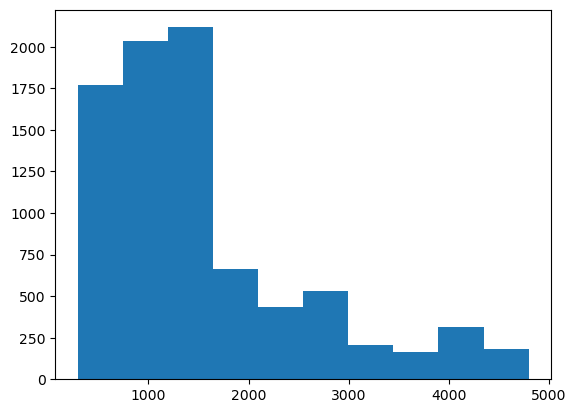

volume


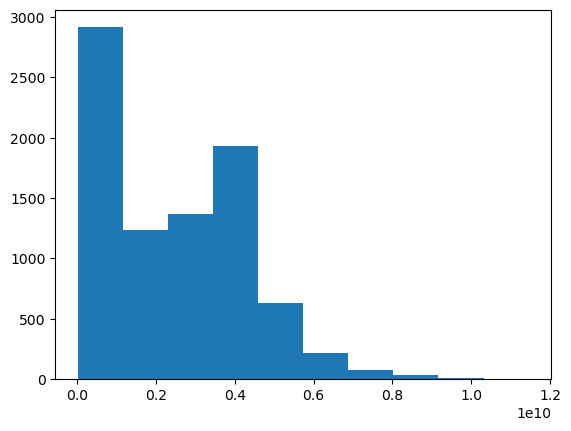

tomorrow


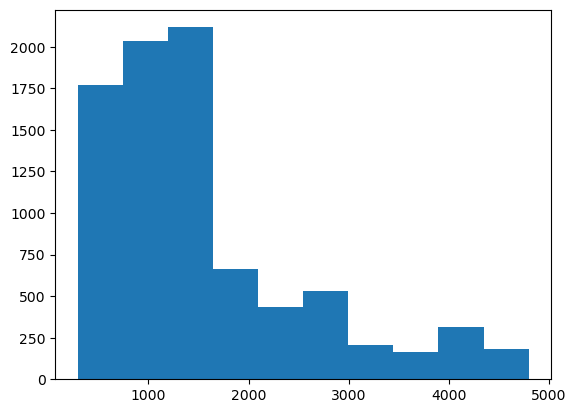

target


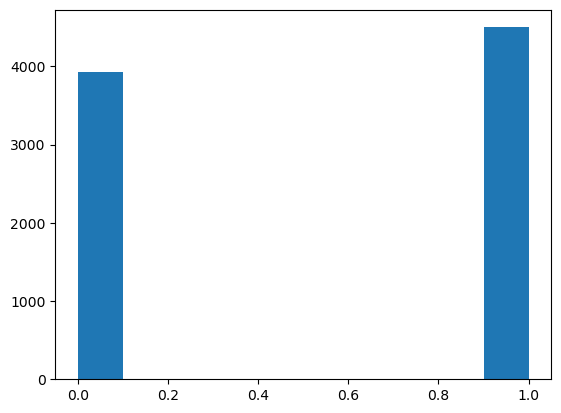

In [50]:
for col in sp500.columns:
    print(col)
    plt.hist(sp500[col])
    plt.show()

#### add to prep - datetime index

In [56]:
# need to add this to prep 
sp500.index = pd.to_datetime(sp500.index, format = '%Y %m %d')

DatetimeIndex(['1990-01-02', '1990-01-03', '1990-01-04', '1990-01-05',
               '1990-01-08', '1990-01-09', '1990-01-10', '1990-01-11',
               '1990-01-12', '1990-01-15',
               ...
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-30', '2023-05-31', '2023-06-01',
               '2023-06-02', '2023-06-05'],
              dtype='datetime64[ns]', length=8421, freq=None)

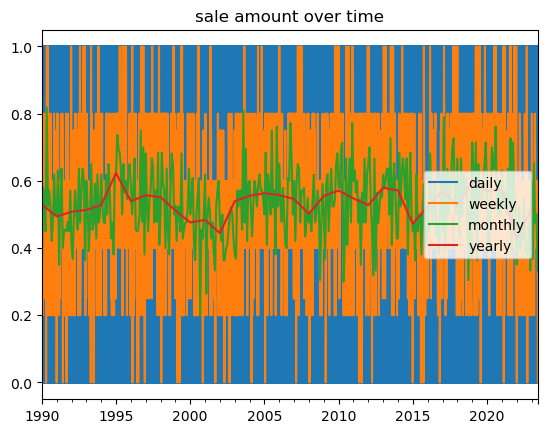

In [58]:
sp500.resample('D').mean().target.plot(label='daily')
sp500.resample('W').mean().target.plot(label='weekly')
sp500.resample('M').mean().target.plot(label='monthly')
sp500.resample('Y').mean().target.plot(label='yearly')


plt.title('sale amount over time')
plt.legend()
plt.show()

### Baseline

In [59]:
#how often is it up / down
sp500.target.value_counts()

1    4498
0    3923
Name: target, dtype: int64

In [61]:
# most importantly % of time the market is up
sp500.target.value_counts().sum()

8421

In [64]:
# so its up 53.4141% of the time this is a good baseline
(sp500.target.value_counts()) / (sp500.target.value_counts().sum())

1    0.534141
0    0.465859
Name: target, dtype: float64

### How to split 
* i think the smaller test set will work for this

In [73]:
# split data using 2023 to date as the test set
train = sp500.loc[:'2022'].copy()
test = sp500.loc['2023'].copy()


In [78]:
print(train.shape)
test.shape

(8315, 7)


(106, 7)

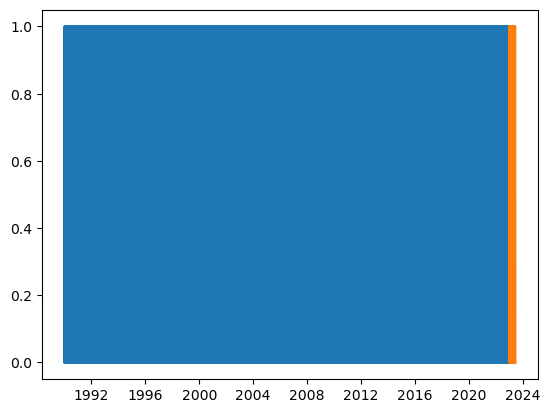

In [67]:
plt.plot(train.index, train.target)
plt.plot(test.index, test.target)
plt.show()

In [79]:
# split using last 20% as test
train_size = 0.80 
n = sp500.shape[0] 
test_start_index = round(train_size * n) 
train = sp500.iloc[:test_start_index] 
test = sp500.iloc[test_start_index:] 

In [80]:
print(train.shape)
test.shape

(6737, 7)


(1684, 7)

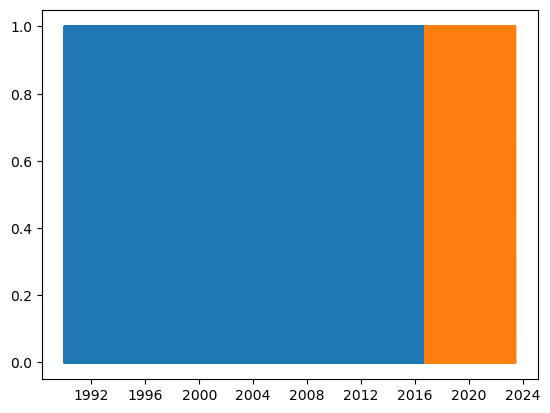

In [81]:
plt.plot(train.index, train.target)
plt.plot(test.index, test.target)
plt.show()

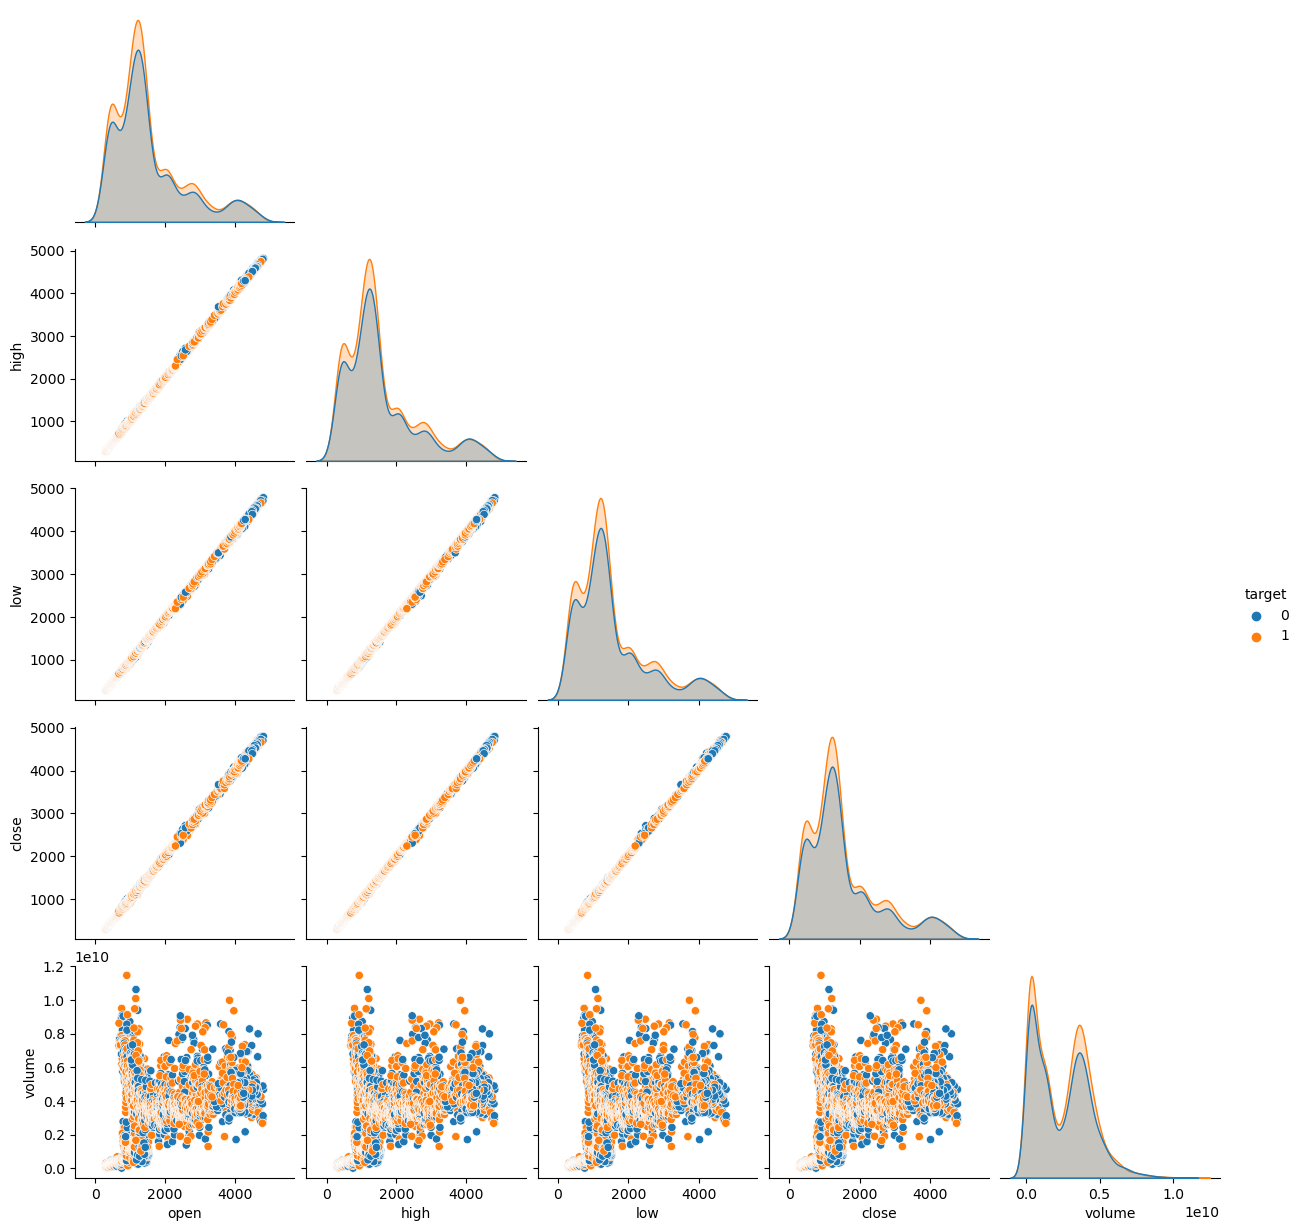

In [39]:
sns.pairplot(data=sp500, hue='target', vars=['open', 'high', 'low', 'close','volume'],corner=True)
